
# Hello Clustering
Recall from lecture that K-means has two main steps: the points assignment
step, and the mean update step. After the initialization of the centroids, we
assign each data point to a centroid. Then, each centroids are updated by
re-estimating the means.
Concretely, if we are given N data points, x1, x2, ..., xN , and we would like
to form K clusters. We do the following;
1. Initialization: Pick K random data points as K centroid locations c1,
c2, ..., cK .
2. Assign: For each data point k, find the closest centroid. Assign that
data point to the centroid. The distance used is typically Euclidean distance.
3. Update: For each centroid, calculate the mean from the data points
assigned to it.
4. Repeat: repeat step 2 and 3 until the centroids stop changing (conver-
gence).
Given the following data points in x-y coordinates (2 dimensional)



In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [32]:
# x y
# 1 2
# 3 3
# 2 2
# 8 8
# 6 6
# 7 7
# -3 -3
# -2 -4
# -7 -7 
# generate a list of points 
points = [(1,2),(3,3),(2,2),(8,8),(6,6),(7,7),(-3,-3),(-2,-4),(-7,-7)] 


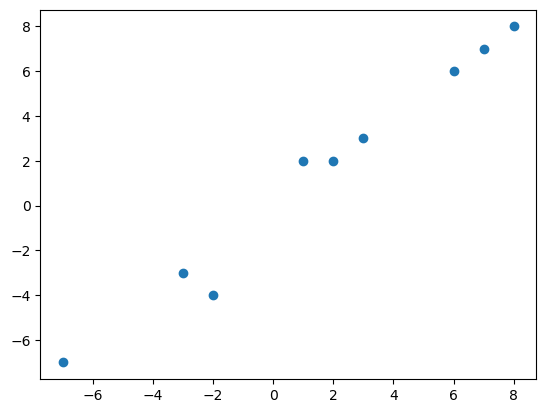

In [33]:
# plot the points 
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.scatter(x,y)

In [34]:
# kmean cluster algorithm 
# 1. randomly select k points as centroids
# 2. assign each point to the closest centroid
# 3. calculate the new centroids
# 4. repeat 2 and 3 until the centroids don't change
# 5. the points in the same cluster are the points that are closest to the same centroid
# 6. the number of clusters is k

In [35]:
points = [(1,2),(3,3),(2,2),(8,8),(6,6),(7,7),(-3,-3),(-2,-4),(-7,-7)] 
import numpy as np

def kcluster(points, centroids):
    points = np.array(points)
    centroids = np.array(centroids)
    
    # Expand dimensions of points and centroids for broadcasting
    points_exp = np.expand_dims(points, axis=1)
    centroids_exp = np.expand_dims(centroids, axis=0)
    
    print(points_exp) 
    print("-------")
    print(centroids_exp)
    # Calculate the Euclidean distance between each point and each centroid
    distances = np.linalg.norm(points_exp - centroids_exp, axis=2)
    
    return distances
print(kcluster(points, [(3,3), (2,2) , (-3,-3)]))

[[[ 1  2]]

 [[ 3  3]]

 [[ 2  2]]

 [[ 8  8]]

 [[ 6  6]]

 [[ 7  7]]

 [[-3 -3]]

 [[-2 -4]]

 [[-7 -7]]]
-------
[[[ 3  3]
  [ 2  2]
  [-3 -3]]]
[[ 2.23606798  1.          6.40312424]
 [ 0.          1.41421356  8.48528137]
 [ 1.41421356  0.          7.07106781]
 [ 7.07106781  8.48528137 15.55634919]
 [ 4.24264069  5.65685425 12.72792206]
 [ 5.65685425  7.07106781 14.14213562]
 [ 8.48528137  7.07106781  0.        ]
 [ 8.60232527  7.21110255  1.41421356]
 [14.14213562 12.72792206  5.65685425]]


In [36]:
def kmeans(X, initial_centroids, max_iters=100):
    X = np.array(X)  # convert X to a numpy array
    centroids = initial_centroids

    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(len(initial_centroids))])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

initial_centroids = np.array([[0, 0], [1, 1], [2, 2]])  # replace with your actual initial centroids
labels, centroids = kmeans(points, initial_centroids)

NameError: name 'k' is not defined

# My heart will go on 
In this part of the exercise we will work on the Titanic dataset provided by
Kaggle. The Titanic dataset contains information of the passengers boarding
the Titanic on its final voyage. We will work on predicting whether a given
passenger will survive the trip.
Let’s launch Jupyter and start coding!
We start by importing the data using Pandas
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set
Both train and test are dataframes. Use the function train.head() and
train.tail() to explore the data. What do you see?
Use the function describe() to get a better understanding of the data.
You can read the meaning of the data fields at https://www.kaggle.com/c/
titanic/data
1Many parts of this exercise are adapted from Kaggle Python Tutorial on Machine Learning
3


In [ ]:
df = pd.read_csv('Titanic_data/train.csv') 


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


T8. What is the median age of the training set? You can easily modify
the age in the dataframe by
```
train["Age"] = train["Age"].fillna(train["Age"].median())
```
Note that you need to modify the code above a bit to fill with mode() because
mode() returns a series rather than a single value.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
# drop the columns that sex isNAN 
df.dropna(subset=['Sex'] , inplace= True) 
df.dropna(subset=['Embarked'] , inplace= True) 
df.dropna(subset=['Pclass'] , inplace= True)


T9. Some fields like ‘Embarked’ are categorical. They need to be converted
to numbers first. We will represent S with 0, C with 1, and Q with 2. What is
the mode of Embarked? Fill the missing values with the mode. You can set the
value of Embarked easily with the following command.
```
train.loc[train["Embarked"] == "S", "Embarked"] = 0
```
-> Do the same for Sex.

In [ ]:
hm ={
    'S':0,
    'C':1,
    'Q':2
}
df['Embarked'] = df['Embarked'].map(hm) 
df.loc[df['Sex'] == 'male' , 'Sex'] =1 
df.loc[df['Sex'] == 'female' , 'Sex'] = 0  


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1


T10. Write a logistic regression classifier using gradient descent as learned
in class. Use PClass, Sex, Age, and Embarked as input features. You can
extract the features from Pandas to Numpy by

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'Embarked']].values  

Y = df['Survived'].values 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, Y_pred))

0.7808988764044944
